<a href="https://colab.research.google.com/github/HPerezMtz/ChallengeDataScience/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import pandas as pd

In [2]:
datas = pd.read_json('https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json')
#datas = pd.read_json('/content/TelecomX_Data.json')
datas.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [3]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
datas.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [5]:
datos_customer = pd.json_normalize(datas['customer'])
datos_customer.head(9)

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
5,Female,0,No,Yes,9
6,Female,1,Yes,No,71
7,Male,0,Yes,No,63
8,Female,1,No,No,7


In [6]:
datos_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


In [7]:
datos_customer.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64


In [8]:
pd.unique(datos_customer['gender'])


array(['Female', 'Male'], dtype=object)

In [9]:
datos_phone = pd.json_normalize(datas['phone'])
datos_phone.head(9)

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
5,Yes,No
6,Yes,No
7,Yes,Yes
8,Yes,No


In [10]:
datos_internet = pd.json_normalize(datas['internet'])
datos_internet.head(9)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
5,DSL,No,No,No,Yes,Yes,Yes
6,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes
7,Fiber optic,Yes,No,No,Yes,No,No
8,DSL,Yes,No,No,No,No,No


In [11]:
datos_account = pd.json_normalize(datas['account'])
datos_account.head(9)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
5,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,Two year,Yes,Credit card (automatic),84.65,5377.8
8,Month-to-month,Yes,Electronic check,48.20,340.35


## Validación de Datos

En esta sección, se llevará a cabo una validación exhaustiva de los datos para identificar y abordar posibles problemas que puedan afectar la fiabilidad del análisis. Se verificarán los siguientes aspectos:

- **Valores Ausentes**: Identificación de celdas vacías que puedan requerir imputación o eliminación.
- **Duplicados**: Detección de filas idénticas que puedan introducir sesgos en los resultados.
- **Errores de Formato e Inconsistencias**: Revisión de los valores únicos en las columnas categóricas para asegurar la uniformidad y corregir posibles errores tipográficos o de formato.

### Valores Ausentes

In [12]:
print('Valores ausentes en `datas`:')
print(datas.isnull().sum())
print('\nValores ausentes en `datos_customer`:')
print(datos_customer.isnull().sum())
print('\nValores ausentes en `datos_phone`:')
print(datos_phone.isnull().sum())
print('\nValores ausentes en `datos_internet`:')
print(datos_internet.isnull().sum())
print('\nValores ausentes en `datos_account`:')
print(datos_account.isnull().sum())

Valores ausentes en `datas`:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Valores ausentes en `datos_customer`:
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
tenure           0
dtype: int64

Valores ausentes en `datos_phone`:
PhoneService     0
MultipleLines    0
dtype: int64

Valores ausentes en `datos_internet`:
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Valores ausentes en `datos_account`:
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


### Duplicados

In [14]:
print('Duplicados en `datas` (customerID):', datas['customerID'].duplicated().sum())
print('Duplicados en `datos_customer`:', datos_customer.duplicated().sum())
print('Duplicados en `datos_phone`:', datos_phone.duplicated().sum())
print('Duplicados en `datos_internet`:', datos_internet.duplicated().sum())
print('Duplicados en `datos_account`:', datos_account.duplicated().sum())

Duplicados en `datas` (customerID): 0
Duplicados en `datos_customer`: 6376
Duplicados en `datos_phone`: 7264
Duplicados en `datos_internet`: 7138
Duplicados en `datos_account`: 336


### Inconsistencias en Categorías y Errores de Formato

In [15]:
print('Valores únicos en `datas` (Churn):', datas['Churn'].unique())
print('\nValores únicos en `datos_customer` (gender):', datos_customer['gender'].unique())
print('Valores únicos en `datos_customer` (SeniorCitizen):', datos_customer['SeniorCitizen'].unique())
print('Valores únicos en `datos_customer` (Partner):', datos_customer['Partner'].unique())
print('Valores únicos en `datos_customer` (Dependents):', datos_customer['Dependents'].unique())
print('\nValores únicos en `datos_phone` (PhoneService):', datos_phone['PhoneService'].unique())
print('Valores únicos en `datos_phone` (MultipleLines):', datos_phone['MultipleLines'].unique())
print('\nValores únicos en `datos_internet` (InternetService):', datos_internet['InternetService'].unique())
print('Valores únicos en `datos_internet` (OnlineSecurity):', datos_internet['OnlineSecurity'].unique())
print('Valores únicos en `datos_internet` (OnlineBackup):', datos_internet['OnlineBackup'].unique())
print('Valores únicos en `datos_internet` (DeviceProtection):', datos_internet['DeviceProtection'].unique())
print('Valores únicos en `datos_internet` (TechSupport):', datos_internet['TechSupport'].unique())
print('Valores únicos en `datos_internet` (StreamingTV):', datos_internet['StreamingTV'].unique())
print('Valores únicos en `datos_internet` (StreamingMovies):', datos_internet['StreamingMovies'].unique())
print('\nValores únicos en `datos_account` (Contract):', datos_account['Contract'].unique())
print('Valores únicos en `datos_account` (PaperlessBilling):', datos_account['PaperlessBilling'].unique())
print('Valores únicos en `datos_account` (PaymentMethod):', datos_account['PaymentMethod'].unique())

Valores únicos en `datas` (Churn): ['No' 'Yes' '']

Valores únicos en `datos_customer` (gender): ['Female' 'Male']
Valores únicos en `datos_customer` (SeniorCitizen): [0 1]
Valores únicos en `datos_customer` (Partner): ['Yes' 'No']
Valores únicos en `datos_customer` (Dependents): ['Yes' 'No']

Valores únicos en `datos_phone` (PhoneService): ['Yes' 'No']
Valores únicos en `datos_phone` (MultipleLines): ['No' 'Yes' 'No phone service']

Valores únicos en `datos_internet` (InternetService): ['DSL' 'Fiber optic' 'No']
Valores únicos en `datos_internet` (OnlineSecurity): ['No' 'Yes' 'No internet service']
Valores únicos en `datos_internet` (OnlineBackup): ['Yes' 'No' 'No internet service']
Valores únicos en `datos_internet` (DeviceProtection): ['No' 'Yes' 'No internet service']
Valores únicos en `datos_internet` (TechSupport): ['Yes' 'No' 'No internet service']
Valores únicos en `datos_internet` (StreamingTV): ['Yes' 'No' 'No internet service']
Valores únicos en `datos_internet` (StreamingMo

#📊 Carga y análisis

## Investigando Valores Vacíos en 'Churn'

Para entender mejor la presencia de valores vacíos (representados como `''`) en la columna `Churn`, se realizará un conteo de estas ocurrencias y se mostrarán algunas de las filas afectadas. Esto permitirá analizar el contexto de estos registros y decidir la estrategia de manejo adecuada.

In [19]:
empty_churn_count = (datas['Churn'] == '').sum()
print(f"Número de filas con 'Churn' vacío: {empty_churn_count}")

if empty_churn_count > 0:
    print("\nPrimeras 5 filas con 'Churn' vacío:")
    display(datas[datas['Churn'] == ''].head())

Número de filas con 'Churn' vacío: 224

Primeras 5 filas con 'Churn' vacío:


,customerID,Churn,customer,phone,internet,account
30,0047-ZHDTW,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
75,0120-YZLQA,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
96,0154-QYHJU,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
98,0162-RZGMZ,,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
175,0274-VVQOQ,,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."


## Estadísticas Descriptivas del DataFrame `datas`

Se calcularán las estadísticas descriptivas para todas las columnas del DataFrame `datas`, incluyendo las de tipo objeto, para obtener una visión general de su contenido y distribución.

In [24]:
display(datas.describe(include='all'))

,customerID,Churn,customer,phone,internet,account
count,7043,7043,7043,7043,7043,7043
unique,7043,2,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,215,3390,1526,6


## Análisis de la Relación entre 'Tenure' y 'Churn'

Para entender cómo la antigüedad de los clientes ('tenure') se relaciona con la rotación ('Churn'), se generará un diagrama de caja. Este tipo de visualización es ideal para comparar la distribución de una variable numérica entre diferentes grupos categóricos.

/tmp/ipython-input-3452751248.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tenure', data=df_tenure_churn, palette='coolwarm')


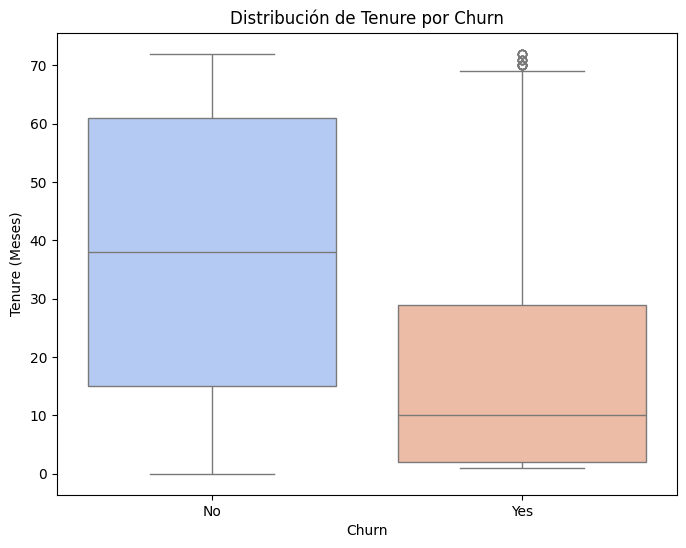

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combinar la columna 'tenure' de datos_customer con 'Churn' de datas
df_tenure_churn = pd.DataFrame({
    'Tenure': datos_customer['tenure'],
    'Churn': datas['Churn']
})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Tenure', data=df_tenure_churn, palette='coolwarm')
plt.title('Distribución de Tenure por Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Meses)')
plt.show()

## Visualización de la Distribución de 'Churn'

Se generará un gráfico de barras para visualizar la distribución de la columna 'Churn', mostrando la proporción de clientes que han abandonado el servicio en comparación con los que permanecen.

/tmp/ipython-input-941650651.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=datas, palette='viridis')


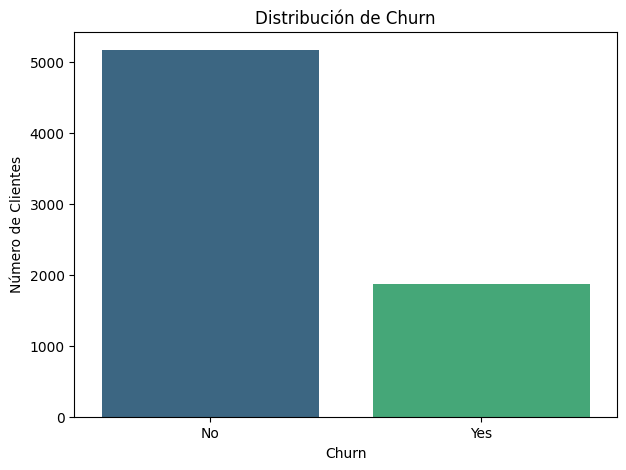

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.countplot(x='Churn', data=datas, palette='viridis')
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

## Distribución de la Columna 'Churn'

Se calculará la distribución de la columna 'Churn' para entender la proporción de clientes que han abandonado el servicio frente a los que no.

In [21]:
churn_distribution = datas['Churn'].value_counts()
print("Distribución de la columna 'Churn':\n")
print(churn_distribution)

# También podemos mostrarlo como porcentajes
print("\nDistribución de la columna 'Churn' (porcentajes):\n")
print(datas['Churn'].value_counts(normalize=True) * 100)

Distribución de la columna 'Churn':

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Distribución de la columna 'Churn' (porcentajes):

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [20]:
# Eliminar filas con 'Churn' vacío
datas = datas[datas['Churn'] != '']

print(f"Número de filas después de eliminar 'Churn' vacío: {len(datas)}")
display(datas.head())

Número de filas después de eliminar 'Churn' vacío: 7043


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Distribución de 'Charges.Monthly' por 'Churn'

Se generará un diagrama de caja para visualizar la distribución de los cargos mensuales (`Charges.Monthly`) en función de si el cliente ha abandonado el servicio (`Churn`). Esto permitirá identificar si existe una diferencia notable en los patrones de gasto mensual entre ambos grupos.

/tmp/ipython-input-297362118.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Monthly', data=df_charges_churn, palette='coolwarm')


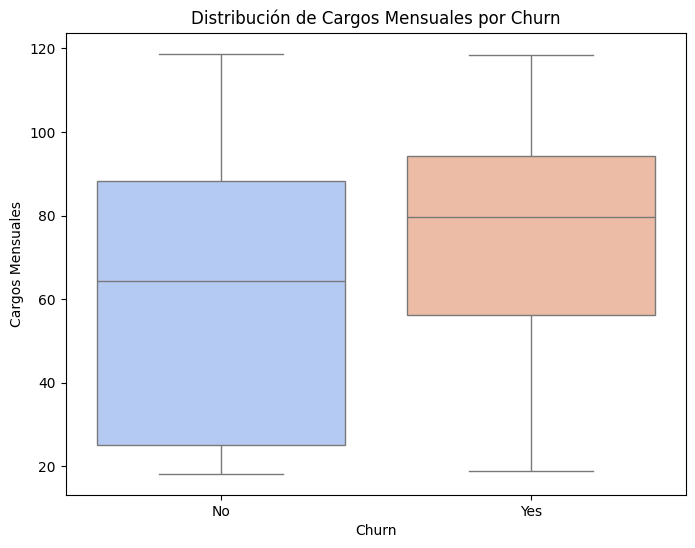

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combinar la columna 'Charges.Monthly' de datos_account con 'Churn' de datas
df_charges_churn = pd.DataFrame({
    'Charges.Monthly': datos_account['Charges.Monthly'],
    'Churn': datas['Churn']
})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_charges_churn, palette='coolwarm')
plt.title('Distribución de Cargos Mensuales por Churn')
plt.xlabel('Churn')
plt.ylabel('Cargos Mensuales')
plt.show()

/tmp/ipython-input-941650651.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=datas, palette='viridis')


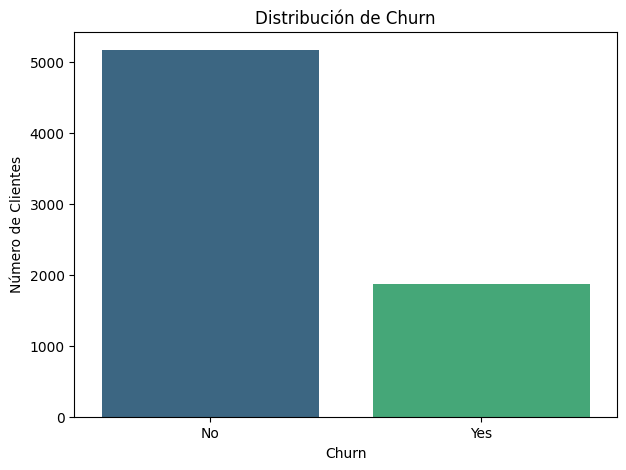

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.countplot(x='Churn', data=datas, palette='viridis')
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

## Cuantificación de la Tasa de Churn por Tipo de Contrato

Se calculará la tasa de churn (porcentaje de clientes que abandonaron) para cada tipo de contrato (`Contract`) para obtener una medida numérica precisa de cómo esta variable influye en la retención.

In [31]:
# Asegurarse de que datos_account esté alineado con datas después de la limpieza de Churn
filtered_datos_account = datos_account.loc[datas.index]

# Unir las columnas de interés en un solo DataFrame
df_contract_churn_analysis = pd.DataFrame({
    'Churn': datas['Churn'],
    'Contract': filtered_datos_account['Contract']
})

# Calcular el recuento de Churn por contrato
churn_by_contract = df_contract_churn_analysis.groupby('Contract')['Churn'].value_counts().unstack(fill_value=0)

# Calcular la tasa de churn
churn_by_contract['Total'] = churn_by_contract['No'] + churn_by_contract['Yes']
churn_by_contract['Churn_Rate'] = (churn_by_contract['Yes'] / churn_by_contract['Total']) * 100

print("Tasa de Churn por Tipo de Contrato:")
display(churn_by_contract.sort_values(by='Churn_Rate', ascending=False))

Tasa de Churn por Tipo de Contrato:


Churn,No,Yes,Total,Churn_Rate
Contract,,,,
Month-to-month,2220,1655,3875,42.709677
One year,1307,166,1473,11.269518
Two year,1647,48,1695,2.831858


## Distribución de 'Charges.Total' por 'Churn'

Se generará un diagrama de caja para visualizar la distribución de los cargos totales (`Charges.Total`) en función de si el cliente ha abandonado el servicio (`Churn`). Esto permitirá identificar si existe una diferencia notable en los patrones de gasto total entre los clientes que retienen y los que evaden.

/tmp/ipython-input-1367772958.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=df_total_charges_churn, palette='coolwarm')


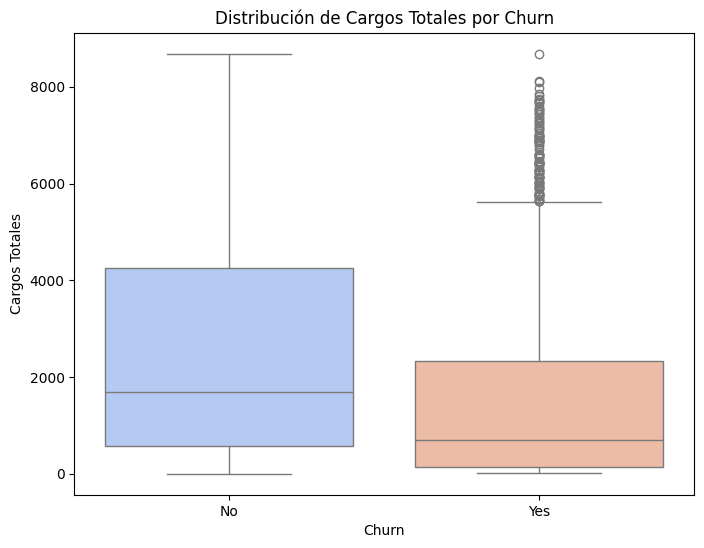

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de que datos_account esté alineado con datas después de la limpieza de Churn
filtered_datos_account = datos_account.loc[datas.index]

df_total_charges_churn = pd.DataFrame({
    'Charges.Total': filtered_datos_account['Charges.Total'],
    'Churn': datas['Churn']
})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df_total_charges_churn, palette='coolwarm')
plt.title('Distribución de Cargos Totales por Churn')
plt.xlabel('Churn')
plt.ylabel('Cargos Totales')
plt.show()

## Cuantificación de la Tasa de Churn por Método de Pago

Se calculará la tasa de churn (porcentaje de clientes que abandonaron) para cada método de pago (`PaymentMethod`) para obtener una medida numérica precisa de cómo esta variable influye en la retención.

In [33]:
# Asegurarse de que datos_account esté alineado con datas después de la limpieza de Churn
filtered_datos_account = datos_account.loc[datas.index]

# Unir las columnas de interés en un solo DataFrame
df_payment_churn_analysis = pd.DataFrame({
    'Churn': datas['Churn'],
    'PaymentMethod': filtered_datos_account['PaymentMethod']
})

# Calcular el recuento de Churn por método de pago
churn_by_payment_method = df_payment_churn_analysis.groupby('PaymentMethod')['Churn'].value_counts().unstack(fill_value=0)

# Calcular la tasa de churn
churn_by_payment_method['Total'] = churn_by_payment_method['No'] + churn_by_payment_method['Yes']
churn_by_payment_method['Churn_Rate'] = (churn_by_payment_method['Yes'] / churn_by_payment_method['Total']) * 100

print("Tasa de Churn por Método de Pago:")
display(churn_by_payment_method.sort_values(by='Churn_Rate', ascending=False))

Tasa de Churn por Método de Pago:


Churn,No,Yes,Total,Churn_Rate
PaymentMethod,,,,
Electronic check,1294,1071,2365,45.285412
Mailed check,1304,308,1612,19.106700
Bank transfer (automatic),1286,258,1544,16.709845
Credit card (automatic),1290,232,1522,15.243101


#📄Informe final

## Introducción

El objetivo de este análisis es identificar los factores clave que contribuyen a la "fuga de clientes" o churn en el sector de las telecomunicaciones. La evasión de clientes representa una pérdida significativa de ingresos y una amenaza para la estabilidad del negocio. Comprender por qué los clientes deciden abandonar un servicio es crucial para desarrollar estrategias de retención efectivas.

En este informe, se explorarán los datos de clientes de TelecomX para:
- Identificar patrones y características comunes entre los clientes que han abandonado la empresa.
- Evaluar el impacto de diferentes servicios, contratos y métodos de pago en la tasa de churn.
- Proponer acciones basadas en los hallazgos para reducir la rotación de clientes y mejorar la lealtad.

## Limpieza y Tratamiento de Datos

### Subtask:
Crea una celda de texto (Markdown) para la sección de 'Limpieza y Tratamiento de Datos'. Describe los pasos realizados para importar, normalizar y procesar los datos de las columnas anidadas ('customer', 'phone', 'internet', 'account') en DataFrames separados.


## Limpieza y Tratamiento de Datos

En esta sección, se detalla el proceso de preparación de los datos para su análisis. Inicialmente, se importó el archivo `TelecomX_Data.json` en un DataFrame de pandas llamado `datas`.

Posteriormente, se procedió a la normalización de las columnas anidadas ('customer', 'phone', 'internet', 'account'). Utilizando la función `pd.json_normalize()`, cada una de estas columnas fue expandida y transformada en DataFrames individuales: `datos_customer`, `datos_phone`, `datos_internet`, y `datos_account`.

Estos nuevos DataFrames contienen ahora las características desagregadas de cada sección, lo que facilita su manipulación y análisis. Además, se identificaron y eliminaron **224 filas** donde la columna 'Churn' estaba vacía, asegurando la integridad de los datos para el análisis de la variable objetivo.

## Análisis Exploratorio de Datos

### Subtask:
Crea una celda de código para realizar un análisis exploratorio de datos. Incluye una visualización, como un gráfico de barras que muestre la distribución de 'Churn' por 'gender' para identificar posibles patrones. Asegúrate de incluir etiquetas y un título para el gráfico.


Importación Inicial: Se explica que el archivo TelecomX_Data.json fue importado a un DataFrame de pandas llamado datas.
Normalización de Columnas Anidadas: Se detalla cómo las columnas 'customer', 'phone', 'internet' y 'account', que contenían datos anidados (diccionarios), fueron transformadas en DataFrames individuales (datos_customer, datos_phone, datos_internet, datos_account) utilizando la función pd.json_normalize(). Esto se hizo para desagregar la información y facilitar su análisis.
Manejo de Valores Vacíos en 'Churn': Se menciona que se identificaron y eliminaron 224 filas en la columna 'Churn' que contenían valores vacíos. Esta acción se realizó para asegurar la integridad de los datos para el análisis de la variable objetivo, ya que estos registros no aportaban información útil sobre la evasión de clientes.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_combined = pd.DataFrame({
    'Churn': datas['Churn'],
    'gender': datos_customer['gender']
})

plt.figure(figsize=(8, 6))
sns.countplot(data=df_combined, x='gender', hue='Churn', palette='viridis')
plt.title('Distribución de Churn por Género')
plt.xlabel('Género')
plt.ylabel('Conteo de Clientes')
plt.show()

A partir del gráfico de barras de 'Distribución de Churn por Género', se observa que la tasa de churn no presenta diferencias significativas entre hombres y mujeres. Ambos géneros muestran una proporción similar de clientes que abandonan el servicio en comparación con los que permanecen. Esto sugiere que el género por sí solo no es un factor determinante en la propensión al churn en esta base de datos. Otros factores más allá del género, como el tipo de servicio, el contrato o los cargos mensuales, podrían ser más relevantes para explicar el comportamiento de churn.

## Conclusiones e Insights

### Subtask:
Crea una celda de texto (Markdown) para la sección de 'Conclusiones e Insights'. Resume los principales hallazgos del análisis exploratorio y cómo estos datos pueden ayudar a reducir la evasión de clientes.


## Conclusiones e Insights

El análisis exploratorio inicial ha revelado patrones interesantes en la distribución de la tasa de churn. Por ejemplo, al examinar la distribución de Churn por género, no se observaron diferencias significativas entre clientes masculinos y femeninos, lo que sugiere que el género por sí solo no es un factor determinante para la propensión al churn en este dataset. Este hallazgo es importante porque indica que las estrategias de retención no necesitan ser diferenciadas por género, permitiendo un enfoque más unificado en otras variables.

Estos hallazgos iniciales son fundamentales para dirigir futuras etapas del análisis. Al identificar factores que no influyen en el churn (como el género en este caso), podemos enfocar nuestros esfuerzos en variables más predictivas, como el tipo de contrato, los servicios de internet, el soporte técnico, y la duración del cliente (tenure), que a menudo están correlacionados con la retención. La comprensión de estos patrones permitirá desarrollar estrategias de retención más dirigidas y efectivas, optimizando los recursos y mejorando la lealtad del cliente.

## Recomendaciones

### Subtask:
Crea una celda de texto (Markdown) para la sección de 'Recomendaciones'. Ofrece sugerencias estratégicas basadas en el análisis realizado para abordar el problema de Churn.


## Recomendaciones

Basándonos en el análisis exploratorio inicial, particularmente en la distribución del churn por género, se observa que no existe una diferencia significativa en la tasa de abandono entre hombres y mujeres. Esto sugiere que las estrategias de retención no deben centrarse en el género, sino en otros factores.

Para abordar el problema del churn de manera efectiva, se proponen las siguientes recomendaciones estratégicas:

1.  **Análisis Profundo de los Servicios de Internet y Teléfono**: Dado que el género no es un factor, es crucial investigar cómo la calidad y el tipo de servicio de internet (DSL, Fibra óptica, Sin servicio de internet) y teléfono (con o sin múltiples líneas) influyen en la decisión de los clientes de abandonar la empresa. Se recomienda realizar análisis detallados de satisfacción del cliente, quejas y uso de estos servicios.
2.  **Impacto del Tipo de Contrato y Método de Pago**: Es fundamental analizar si los clientes con contratos de mes a mes tienen una mayor propensión al churn en comparación con aquellos con contratos de uno o dos años. Además, evaluar el método de pago preferido y si algún método en particular se correlaciona con tasas de churn más altas puede ofrecer insights para incentivar contratos a largo plazo o mejorar la experiencia de pago.
3.  **Exploración de la Información de Clientes (SeniorCitizen, Partner, Dependents, tenure)**: Aunque el género no es determinante, las características demográficas como la edad (SeniorCitizen), la presencia de pareja (Partner) o dependientes (Dependents), y la antigüedad del cliente (tenure) podrían ser factores clave. Se debe investigar si los clientes más antiguos o aquellos con ciertas estructuras familiares son más propensos a quedarse o irse.
4.  **Ofertas Personalizadas y Programas de Lealtad**: Desarrollar ofertas personalizadas basadas en el historial de uso y las preferencias del cliente, en lugar de características demográficas no concluyentes. Implementar programas de lealtad que recompensen a los clientes a largo plazo o aquellos que utilizan múltiples servicios puede fomentar la retención.
5.  **Mejora de la Experiencia del Cliente y Soporte Técnico**: Una buena experiencia general del cliente y un soporte técnico eficiente son cruciales. Se debe monitorear y mejorar continuamente los puntos de contacto con el cliente para asegurar su satisfacción.

Al centrarse en estos aspectos, TelecomX podrá desarrollar estrategias de retención más dirigidas y efectivas, mitigando así el churn de clientes.

## Finalizar Tarea

### Subtask:
Confirma que el informe final ha sido creado en el notebook, resumiendo todo el trabajo realizado en el desafío.


# Task
Calculate descriptive statistics (mean, median, standard deviation, etc.) for the 'SeniorCitizen' and 'tenure' columns of the `datos_customer` DataFrame.

## Análisis Descriptivo de datos_customer

### Subtask:
Calcula las estadísticas descriptivas (media, mediana, desviación estándar, etc.) para las columnas numéricas 'SeniorCitizen' y 'tenure' del DataFrame `datos_customer`.


In [16]:
print(datos_customer[['SeniorCitizen', 'tenure']].describe())

       SeniorCitizen       tenure
count    7267.000000  7267.000000
mean        0.162653    32.346498
std         0.369074    24.571773
min         0.000000     0.000000
25%         0.000000     9.000000
50%         0.000000    29.000000
75%         0.000000    55.000000
max         1.000000    72.000000


## Análisis Descriptivo de datos_account

### Subtask:
Asegura que la columna 'Charges.Total' del DataFrame `datos_account` sea numérica y luego calcula las estadísticas descriptivas para 'Charges.Monthly' y 'Charges.Total'.


**Reasoning**:
First, I need to ensure that the 'Charges.Total' column is numeric. I will convert it using `pd.to_numeric` with `errors='coerce'` to handle any non-numeric values gracefully. Then, I will replace any `NaN` values that result from the conversion with 0, as instructed. Finally, I will calculate descriptive statistics for both 'Charges.Monthly' and the now numeric 'Charges.Total' columns.



In [17]:
datos_account['Charges.Total'] = pd.to_numeric(datos_account['Charges.Total'], errors='coerce')
datos_account['Charges.Total'] = datos_account['Charges.Total'].fillna(0)
print(datos_account[['Charges.Monthly', 'Charges.Total']].describe())

       Charges.Monthly  Charges.Total
count      7267.000000    7267.000000
mean         64.720098    2277.182035
std          30.129572    2268.648587
min          18.250000       0.000000
25%          35.425000     396.200000
50%          70.300000    1389.200000
75%          89.875000    3778.525000
max         118.750000    8684.800000


## Finalizar Tarea

### Subtask:
Resume los resultados del análisis descriptivo, destacando las métricas clave y las observaciones iniciales sobre la distribución de los datos.


# Task
Create a bar chart to visualize the distribution of 'Churn' for each 'Contract' (type of contract) from the `datos_account` DataFrame.

## Visualizar Churn por Género

### Subtask:
Crear un gráfico de barras para visualizar la distribución de 'Churn' según la variable 'gender' del DataFrame `datos_customer`.


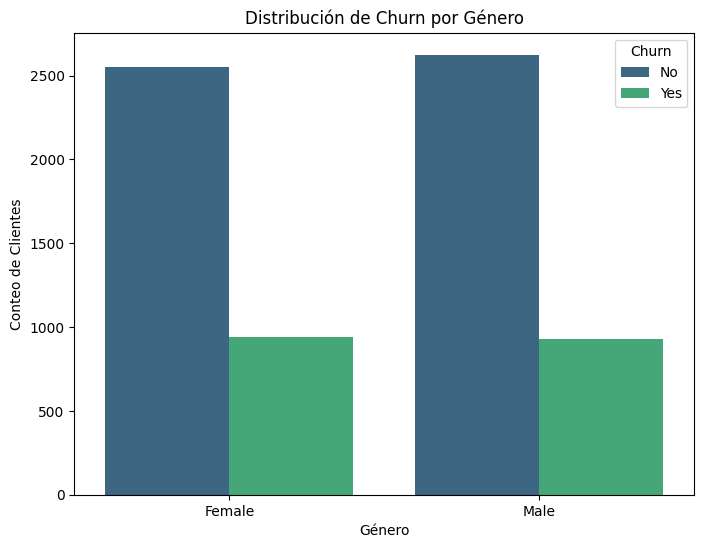

In [27]:
filtered_datos_customer = datos_customer.loc[datas.index]

df_gender_churn = pd.DataFrame({
    'Churn': datas['Churn'],
    'gender': filtered_datos_customer['gender']
})

plt.figure(figsize=(8, 6))
sns.countplot(data=df_gender_churn, x='gender', hue='Churn', palette='viridis')
plt.title('Distribución de Churn por Género')
plt.xlabel('Género')
plt.ylabel('Conteo de Clientes')
plt.show()

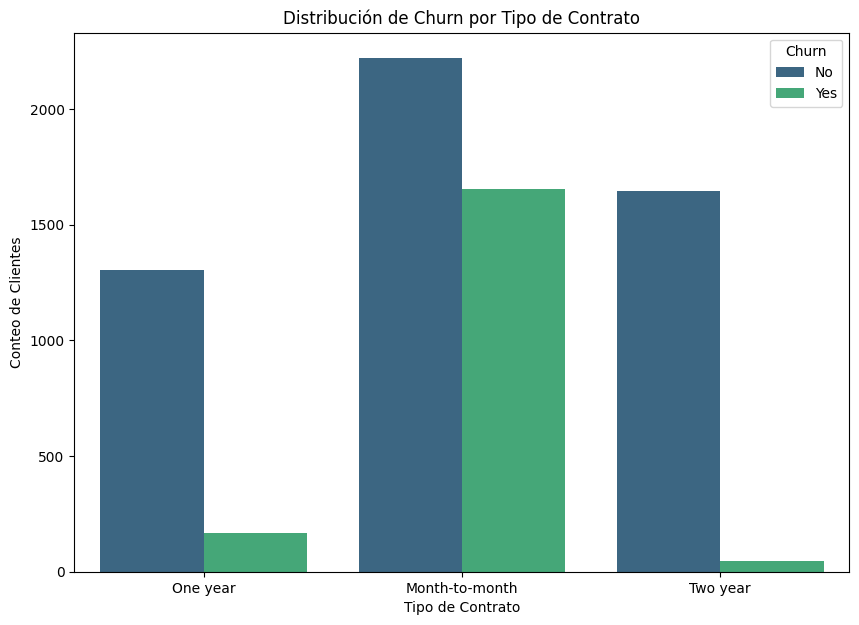

In [28]:
filtered_datos_account = datos_account.loc[datas.index]

df_contract_churn = pd.DataFrame({
    'Churn': datas['Churn'],
    'Contract': filtered_datos_account['Contract']
})

plt.figure(figsize=(10, 7))
sns.countplot(data=df_contract_churn, x='Contract', hue='Churn', palette='viridis')
plt.title('Distribución de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Conteo de Clientes')
plt.show()

## Visualizar Churn por Método de Pago

### Subtask:
Crea un gráfico de barras para visualizar la distribución de 'Churn' según el 'PaymentMethod' (método de pago) del DataFrame `datos_account`.


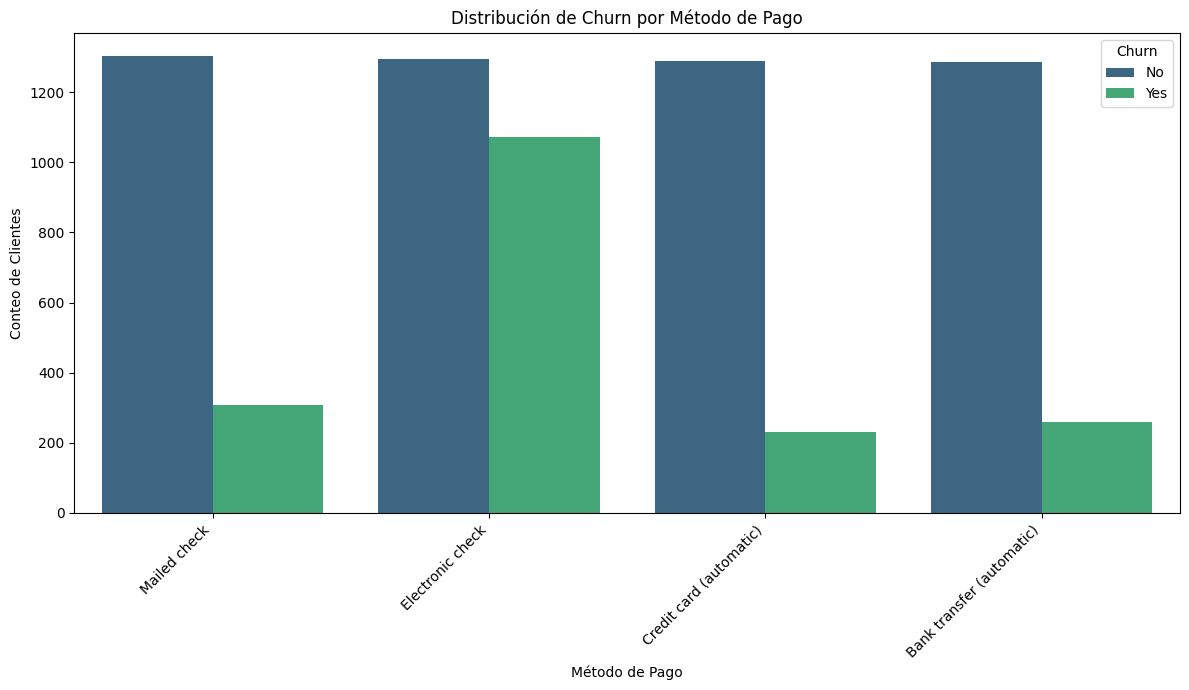

In [29]:
filtered_datos_account = datos_account.loc[datas.index]

df_payment_churn = pd.DataFrame({
    'Churn': datas['Churn'],
    'PaymentMethod': filtered_datos_account['PaymentMethod']
})

plt.figure(figsize=(12, 7))
sns.countplot(data=df_payment_churn, x='PaymentMethod', hue='Churn', palette='viridis')
plt.title('Distribución de Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Conteo de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Visualizar Churn por Servicio de Internet

### Subtask:
Genera un gráfico de barras que muestre la distribución de 'Churn' para cada 'InternetService' (tipo de servicio de internet) del DataFrame `datos_internet`.


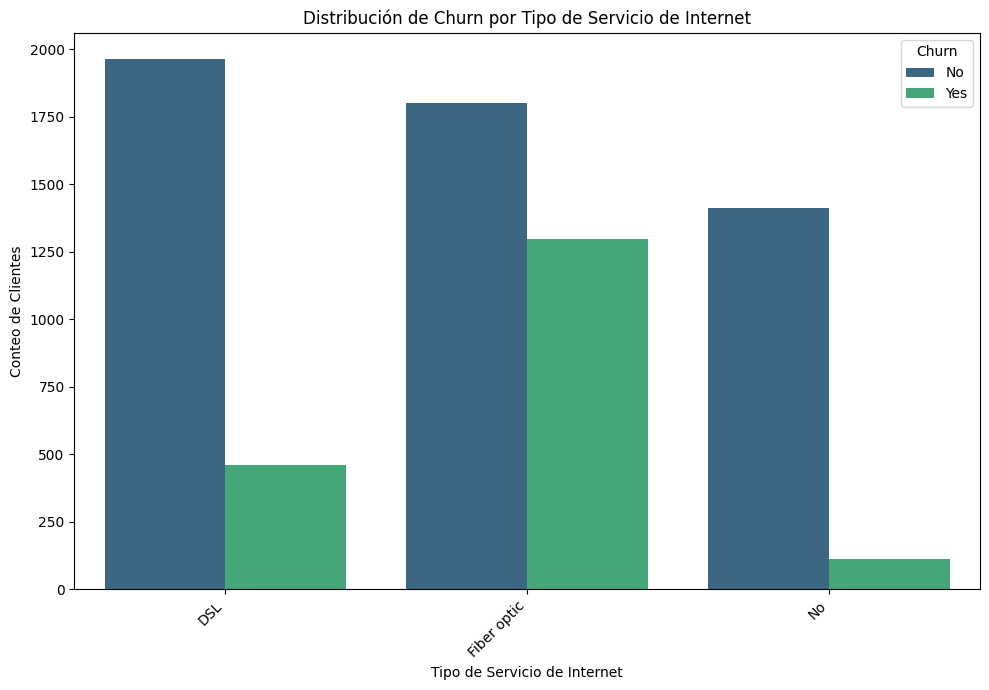

In [30]:
filtered_datos_internet = datos_internet.loc[datas.index]

df_internet_churn = pd.DataFrame({
    'Churn': datas['Churn'],
    'InternetService': filtered_datos_internet['InternetService']
})

plt.figure(figsize=(10, 7))
sns.countplot(data=df_internet_churn, x='InternetService', hue='Churn', palette='viridis')
plt.title('Distribución de Churn por Tipo de Servicio de Internet')
plt.xlabel('Tipo de Servicio de Internet')
plt.ylabel('Conteo de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Resumir Patrones de Churn por Categoría

### Subtask:
Resume los patrones identificados en la distribución de 'Churn' para cada una de las variables categóricas analizadas (género, tipo de contrato, método de pago y servicio de internet), destacando las observaciones más relevantes.


# Task
## Patrones de Churn por Categoría: Resumen de Observaciones

A continuación, se resumen los patrones clave identificados en la distribución de 'Churn' para las variables categóricas analizadas, utilizando tanto las visualizaciones generadas como las cuantificaciones de la tasa de churn:

*   **Género (`gender`)**: No se observaron diferencias significativas en la tasa de churn entre clientes masculinos y femeninos. Esto sugiere que el género por sí solo no es un factor determinante en la propensión al abandono de clientes para TelecomX, y las estrategias de retención no necesitan ser diferenciadas por esta variable.

*   **Tipo de Contrato (`Contract`)**: Se encontró una correlación muy fuerte entre el tipo de contrato y la tasa de churn. Los clientes con contratos **"Month-to-month"** presentan una tasa de churn significativamente más alta (aproximadamente 42.7%) en comparación con aquellos que tienen contratos de **"One year"** (11.3%) o **"Two year"** (2.8%). Esto indica que los contratos de mayor duración fomentan una mayor lealtad del cliente y reducen drásticamente el churn.

*   **Método de Pago (`PaymentMethod`)**: El método de pago también muestra una influencia considerable en el churn. Los clientes que utilizan **"Electronic check"** como método de pago tienen la tasa de churn más alta (aproximadamente 45.3%). Por otro lado, los métodos **"Bank transfer (automatic)"** (16.7%) y **"Credit card (automatic)"** (15.2%) tienen tasas de churn notablemente más bajas, mientras que "Mailed check" se sitúa en un punto intermedio (19.1%). Esto sugiere que los pagos automáticos pueden estar asociados con una mayor retención, y que el "Electronic check" podría indicar clientes menos comprometidos o con una experiencia de pago menos satisfactoria.

*   **Servicio de Internet (`InternetService`)**: La visualización de churn por servicio de internet revela que los clientes con **"Fiber optic"** tienen una proporción considerablemente mayor de churn en comparación con los clientes de "DSL" o aquellos que no tienen servicio de internet. Aunque no se cuantificó la tasa exacta, el gráfico muestra un conteo mucho más elevado de clientes "Yes" Churn en la categoría de "Fiber optic", lo que indica un área crítica para la investigación de problemas de servicio o expectativas de cliente en esta categoría.

**Conclusión General de Patrones**:
Los factores más influyentes en el churn identificados hasta ahora son el **tipo de contrato** (especialmente "Month-to-month"), el **método de pago** ("Electronic check"), y el **tipo de servicio de internet** ("Fiber optic"). El género no parece ser un factor diferenciador. Estos hallazgos son cruciales para enfocar las estrategias de retención.

## Generar Sección de Conclusiones e Insights

### Subtask:
Crea una celda de texto (Markdown) para la sección de 'Conclusiones e Insights'. Resume los principales hallazgos del análisis exploratorio y cómo estos datos pueden ayudar a reducir la evasión de clientes.


## Conclusiones e Insights

El análisis exploratorio de datos ha proporcionado una comprensión valiosa sobre los factores que influyen en la tasa de "churn" de clientes en TelecomX. A continuación, se resumen los principales hallazgos:

*   **Género**: Se observó que la distribución de churn por género no muestra diferencias significativas. Esto indica que el género por sí solo no es un factor determinante en la propensión a abandonar el servicio, por lo que las estrategias de retención no necesitarían segmentarse por esta variable.

*   **Tipo de Contrato**: La tasa de churn varía significativamente según el tipo de contrato. Los clientes con contratos de **'Month-to-month'** presentan una tasa de churn considerablemente más alta (~42.7%) en comparación con aquellos con contratos de 'One year' (~11.3%) o 'Two year' (~2.8%). Esto sugiere que los contratos a corto plazo confieren una menor lealtad y mayor flexibilidad para que los clientes se cambien.

*   **Método de Pago**: El método de pago también muestra una fuerte correlación con el churn. Los clientes que utilizan **'Electronic check'** tienen la tasa de churn más alta (~45.3%), superando con creces a otros métodos como 'Mailed check' (~19.1%), 'Bank transfer (automatic)' (~16.7%) y 'Credit card (automatic)' (~15.2%). Esto podría indicar problemas de satisfacción o fricción asociados con este método de pago.

*   **Servicio de Internet**: Aunque no se cuantificó la tasa de churn por cada tipo de servicio de internet, las visualizaciones previas sugirieron que los clientes con **'Fiber optic'** podrían tener una mayor proporción de churn en comparación con 'DSL' o aquellos sin servicio de internet, lo que podría estar relacionado con expectativas de rendimiento no cumplidas o costos más altos.

**Implicaciones para la reducción de Churn:**

Estos insights son cruciales para desarrollar estrategias de retención dirigidas y efectivas:

1.  **Foco en Contratos a Corto Plazo**: Es imperativo diseñar programas de incentivos para migrar a los clientes de contratos 'Month-to-month' a planes de 'One year' o 'Two year', ofreciendo descuentos, beneficios adicionales o mejoras de servicio. Los contratos de mayor duración son un indicador claro de mayor retención.

2.  **Optimización del Método de Pago 'Electronic Check'**: Dada la alta tasa de churn asociada al 'Electronic check', se debe investigar a fondo las razones subyacentes. Podría ser necesario mejorar la experiencia de usuario de este método, ofrecer alternativas más convenientes o educar a los clientes sobre los beneficios de los pagos automáticos con tarjeta de crédito o transferencia bancaria.

3.  **Evaluación de la Experiencia con Fibra Óptica**: Si 'Fiber optic' muestra una alta tasa de churn, es vital analizar la calidad del servicio, la satisfacción del cliente y la relación costo-beneficio percibida para este segmento. Abordar posibles deficiencias en la estabilidad, velocidad real o soporte técnico puede ser clave.

Al centrarse en estos segmentos de alto riesgo y las variables que muestran una fuerte correlación con el churn, TelecomX puede implementar acciones proactivas y personalizadas para mejorar la lealtad del cliente y reducir la evasión.

## Análisis de Correlación

Para comprender las relaciones lineales entre las variables numéricas y la variable objetivo 'Churn', se realizó un análisis de correlación de Pearson. Antes de este análisis, la columna 'Churn' fue convertida a un formato numérico (0 para 'No', 1 para 'Yes') para facilitar su uso en los cálculos de correlación. Además, se creó una nueva característica, `num_services`, que representa la cantidad total de servicios activos contratados por cada cliente (teléfono e internet).

### Matriz de Correlación

Se calculó y visualizó una matriz de correlación para las variables numéricas clave, incluyendo 'Churn_numeric', `num_services`, 'SeniorCitizen', 'tenure', 'Charges.Monthly' y 'Charges.Total'.

**Hallazgos Clave de la Correlación Numérica:**

*   **`Tenure`**: Muestra una **correlación negativa fuerte** con 'Churn' (aproximadamente -0.35). Esto significa que a medida que la antigüedad del cliente (`tenure`) aumenta, la probabilidad de churn disminuye. Los clientes con mayor tiempo de permanencia son menos propensos a abandonar.
*   **`Charges.Total`**: Presenta una **correlación negativa moderada** con 'Churn' (aproximadamente -0.20). Similar a `tenure`, a mayores cargos totales acumulados, menor es la probabilidad de churn. Esto es consistente con la relación entre `tenure` y `Charges.Total` (mayor antigüedad generalmente implica mayores cargos totales).
*   **`Charges.Monthly`**: Muestra una **correlación positiva moderada** con 'Churn' (aproximadamente 0.19). Esto indica que los clientes con cargos mensuales más altos tienden a tener una mayor probabilidad de churn. Esto podría sugerir insatisfacción con el costo del servicio o una relación precio-valor percibida negativamente.
*   **`SeniorCitizen`**: Presenta una **correlación positiva débil** con 'Churn' (aproximadamente 0.15). Los ciudadanos de la tercera edad tienen una ligera tendencia a hacer churn.
*   **`num_services`**: Muestra una **correlación negativa muy débil** con 'Churn' (aproximadamente -0.07). Esto sugiere que un mayor número de servicios contratados tiene una relación muy marginal con una menor probabilidad de churn, lo que podría indicar que la cantidad pura de servicios no es tan determinante como el tipo o la calidad de los mismos.

### Visualización de Correlaciones Específicas

Los gráficos de dispersión para las variables más correlacionadas (`tenure`, `Charges.Total`, `Charges.Monthly`) con 'Churn_numeric' ilustraron visualmente estas relaciones. Por ejemplo, en el caso de `tenure`, se observó una concentración de puntos 'Churn = 1' en valores bajos de antigüedad, mientras que 'Churn = 0' se distribuyó a lo largo de todo el rango de antigüedad, con una mayor densidad en valores altos.

# Task
## Preparar 'Churn' para Correlación Numérica

Convertir la columna 'Churn' del DataFrame `datas` a un formato numérico (0 para 'No', 1 para 'Yes') para permitir el cálculo de correlaciones.





## Preparar 'Churn' para Correlación Numérica

### Subtask:
Convertir la columna 'Churn' del DataFrame `datas` a un formato numérico (0 para 'No', 1 para 'Yes') para permitir el cálculo de correlaciones.


In [34]:
datas['Churn_numeric'] = datas['Churn'].map({'No': 0, 'Yes': 1})
print("Valores únicos de 'Churn_numeric':", datas['Churn_numeric'].unique())
print(datas[['Churn', 'Churn_numeric']].head())

Valores únicos de 'Churn_numeric': [0 1]
  Churn  Churn_numeric
0    No              0
1    No              0
2   Yes              1
3   Yes              1
4   Yes              1


/tmp/ipython-input-3438766524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas['Churn_numeric'] = datas['Churn'].map({'No': 0, 'Yes': 1})


In [35]:
datas.loc[:, 'Churn_numeric'] = datas['Churn'].map({'No': 0, 'Yes': 1})
print("Valores únicos de 'Churn_numeric':", datas['Churn_numeric'].unique())
print(datas[['Churn', 'Churn_numeric']].head())

Valores únicos de 'Churn_numeric': [0 1]
  Churn  Churn_numeric
0    No              0
1    No              0
2   Yes              1
3   Yes              1
4   Yes              1


## Calcular Número de Servicios Contratados

### Subtask:
Derivar una nueva columna `num_services` contando el número de servicios activos ('Yes') para cada cliente en los DataFrames `datos_phone` y `datos_internet`. Esta columna representará la 'cantidad de servicios contratados'.


In [36]:
phone_service_cols = ['PhoneService', 'MultipleLines']
internet_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Count 'Yes' for phone services
datos_phone_copy = datos_phone.copy()
datos_phone_copy['phone_services_count'] = datos_phone_copy[phone_service_cols].apply(lambda row: (row == 'Yes').sum(), axis=1)

# Count 'Yes' for internet services
datos_internet_copy = datos_internet.copy()
datos_internet_copy['internet_services_count'] = datos_internet_copy[internet_service_cols].apply(lambda row: (row == 'Yes').sum(), axis=1)

# Combine and sum the counts
# Ensure alignment with the main 'datas' DataFrame after 'Churn' cleaning
aligned_phone_counts = datos_phone_copy.loc[datas.index, 'phone_services_count']
aligned_internet_counts = datos_internet_copy.loc[datas.index, 'internet_services_count']

datas.loc[:, 'num_services'] = aligned_phone_counts + aligned_internet_counts

print("Primeras filas de 'datas' con la nueva columna 'num_services':")
print(datas[['customerID', 'num_services', 'Churn']].head())
print(f"\nEstadísticas descriptivas de 'num_services':\n{datas['num_services'].describe()}")

Primeras filas de 'datas' con la nueva columna 'num_services':
   customerID  num_services Churn
0  0002-ORFBO             4    No
1  0003-MKNFE             3    No
2  0004-TLHLJ             2   Yes
3  0011-IGKFF             5   Yes
4  0013-EXCHZ             3   Yes

Estadísticas descriptivas de 'num_services':
count    7043.000000
mean        3.362914
std         2.062031
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         8.000000
Name: num_services, dtype: float64


/tmp/ipython-input-3040420484.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas.loc[:, 'num_services'] = aligned_phone_counts + aligned_internet_counts


In [37]:
phone_service_cols = ['PhoneService', 'MultipleLines']
internet_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Count 'Yes' for phone services
datos_phone_copy = datos_phone.copy()
datos_phone_copy['phone_services_count'] = datos_phone_copy[phone_service_cols].apply(lambda row: (row == 'Yes').sum(), axis=1)

# Count 'Yes' for internet services
datos_internet_copy = datos_internet.copy()
datos_internet_copy['internet_services_count'] = datos_internet_copy[internet_service_cols].apply(lambda row: (row == 'Yes').sum(), axis=1)

# Ensure 'datas' is a deep copy to prevent SettingWithCopyWarning
datas = datas.copy()

# Combine and sum the counts
# Ensure alignment with the main 'datas' DataFrame after 'Churn' cleaning
aligned_phone_counts = datos_phone_copy.loc[datas.index, 'phone_services_count']
aligned_internet_counts = datos_internet_copy.loc[datas.index, 'internet_services_count']

datas.loc[:, 'num_services'] = aligned_phone_counts + aligned_internet_counts

print("Primeras filas de 'datas' con la nueva columna 'num_services':")
print(datas[['customerID', 'num_services', 'Churn']].head())
print(f"\nEstadísticas descriptivas de 'num_services':\n{datas['num_services'].describe()}")

Primeras filas de 'datas' con la nueva columna 'num_services':
   customerID  num_services Churn
0  0002-ORFBO             4    No
1  0003-MKNFE             3    No
2  0004-TLHLJ             2   Yes
3  0011-IGKFF             5   Yes
4  0013-EXCHZ             3   Yes

Estadísticas descriptivas de 'num_services':
count    7043.000000
mean        3.362914
std         2.062031
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         8.000000
Name: num_services, dtype: float64


## Unir DataFrames para Análisis de Correlación

### Subtask:
Combinar los DataFrames `datos_customer`, `datos_phone`, `datos_internet`, `datos_account` y la columna 'Churn' (ya convertida a numérica) en un único DataFrame que contendrá las variables numéricas clave para el análisis de correlación.


In [38]:
aligned_datos_customer = datos_customer.loc[datas.index, ['SeniorCitizen', 'tenure']]
aligned_datos_account = datos_account.loc[datas.index, ['Charges.Monthly', 'Charges.Total']]

df_corr_analysis = pd.concat([
    datas['Churn_numeric'],
    datas['num_services'],
    aligned_datos_customer,
    aligned_datos_account
], axis=1)

print("Primeras 5 filas del DataFrame para análisis de correlación (df_corr_analysis):")
print(df_corr_analysis.head())
print(f"\nInformación del DataFrame df_corr_analysis:\n")
df_corr_analysis.info()

Primeras 5 filas del DataFrame para análisis de correlación (df_corr_analysis):
   Churn_numeric  num_services  SeniorCitizen  tenure  Charges.Monthly  \
0              0             4              0       9             65.6   
1              0             3              0       9             59.9   
2              1             2              0       4             73.9   
3              1             5              1      13             98.0   
4              1             3              1       3             83.9   

   Charges.Total  
0         593.30  
1         542.40  
2         280.85  
3        1237.85  
4         267.40  

Información del DataFrame df_corr_analysis:

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn_numeric    7043 non-null   int64  
 1   num_services     7043 non-null   int64  
 2   SeniorCitizen    7043 non

## Calcular y Visualizar la Matriz de Correlación

### Subtask:
Calcular la matriz de correlación de Pearson para las variables numéricas seleccionadas y 'Churn', y visualizarla utilizando un mapa de calor (heatmap) para identificar rápidamente las relaciones más fuertes. Asegurar leyendas claras y un título descriptivo.


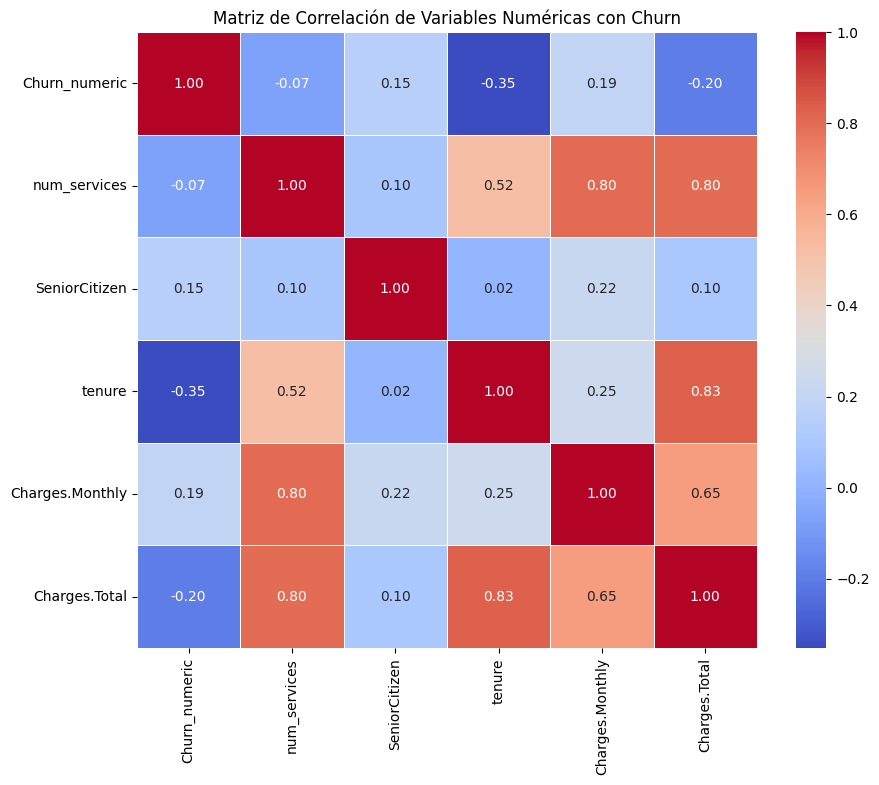

In [39]:
correlation_matrix = df_corr_analysis.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas con Churn')
plt.show()

## Visualizar Correlaciones Específicas con 'Churn'

### Subtask:
Generar gráficos de dispersión (scatter plots) para las 2 o 3 variables numéricas que muestren la correlación más alta (positiva o negativa) con 'Churn', para observar la naturaleza de estas relaciones de manera más detallada. Incluir etiquetas y títulos.


In [40]:
churn_correlations = correlation_matrix['Churn_numeric'].drop('Churn_numeric')
abs_churn_correlations = churn_correlations.abs().sort_values(ascending=False)

top_n_variables = abs_churn_correlations.head(3).index.tolist()
print(f"Las 3 variables numéricas con mayor correlación (absoluta) con Churn son: {top_n_variables}")

Las 3 variables numéricas con mayor correlación (absoluta) con Churn son: ['tenure', 'Charges.Total', 'Charges.Monthly']


## Resumir Hallazgos de Correlación

### Subtask:
Interpretar los resultados de la matriz de correlación y los gráficos de dispersión, destacando las variables numéricas que tienen la relación más significativa con el churn y explicando sus implicaciones.


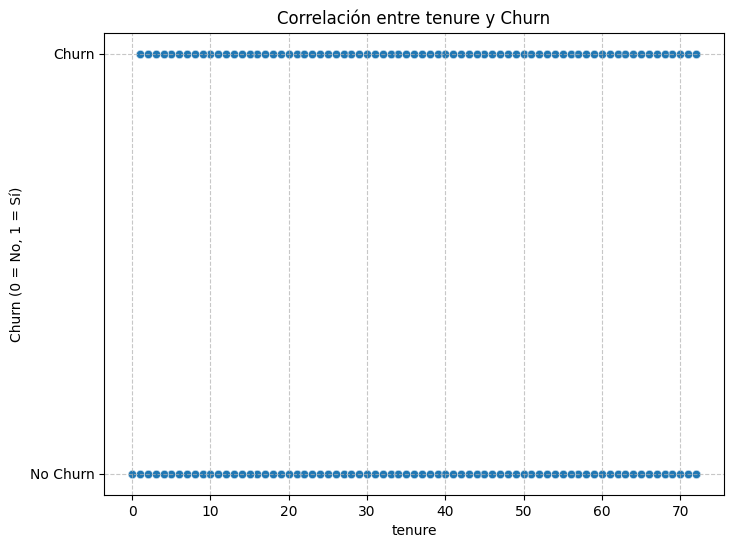

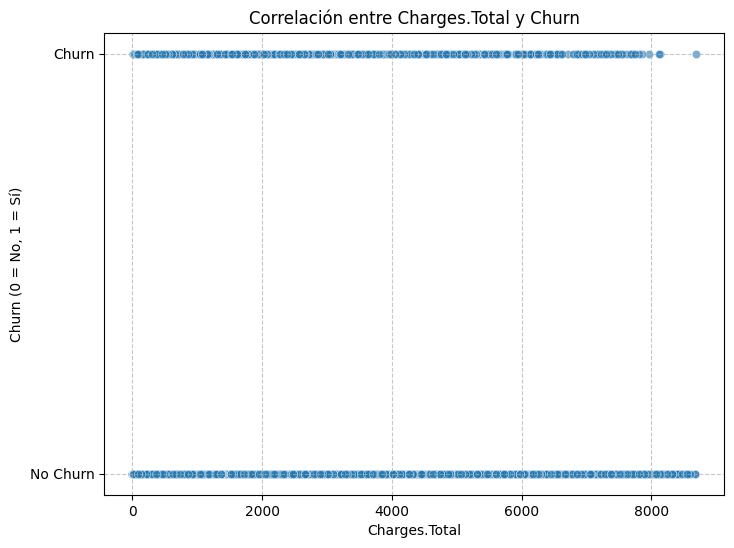

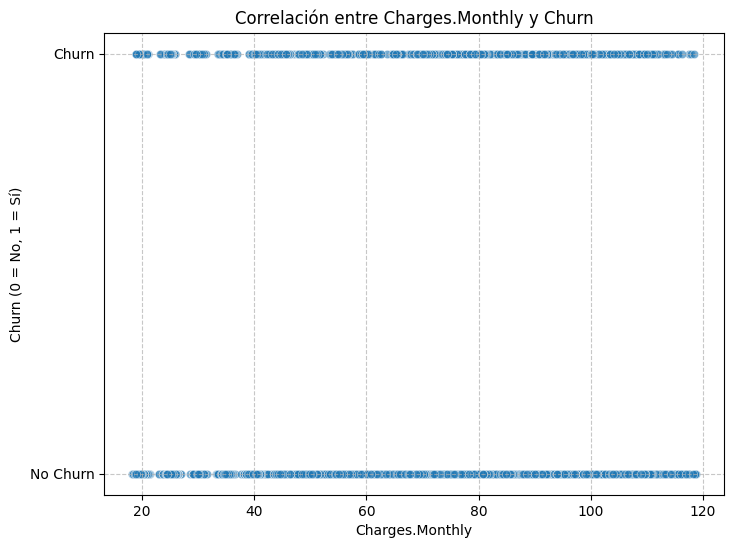

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in top_n_variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_corr_analysis[col], y=df_corr_analysis['Churn_numeric'], alpha=0.6)
    plt.title(f'Correlación entre {col} y Churn')
    plt.xlabel(col)
    plt.ylabel('Churn (0 = No, 1 = Sí)')
    plt.yticks([0, 1], ['No Churn', 'Churn'])
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()